In [1]:
import numpy as np
from sympy import *


решение системы линейных уравнений через    Numpy
1. способ обратной матрицы

In [2]:
A=[[2,3],[0,1]]
b=np.array([2,4])[:, np.newaxis]
An=np.matrix(A)
bn=np.matrix(b)

In [3]:
An_inv=An**(-1)
An_inv

matrix([[ 0.5, -1.5],
        [ 0. ,  1. ]])

In [4]:
rez=An**(-1)*bn
rez

matrix([[-5.],
        [ 4.]])

In [5]:
A*rez==b

matrix([[ True],
        [ True]])

Можно решить непосредственно

In [6]:

np.linalg.solve(An,bn)

matrix([[-5.],
        [ 4.]])

In [7]:
rez==np.linalg.solve(An,bn)

matrix([[ True],
        [ True]])

Решим эту же систему через sympy методом обратных матриц 

In [8]:
As=Matrix(A)
bs=Matrix(b)

In [9]:
As_inv=As**(-1)
As_inv

Matrix([
[1/2, -3/2],
[  0,    1]])

In [10]:
An_inv-As_inv

Matrix([
[0, 0],
[0, 0]])

Видим, что numpy и sympy мало того, что создали одинаковые  обратные матрицы, так ещё их можно между собой вычитать и складывать. Кстати непосредственно решить систему через  linsolve  нам тоже никто не мешает

In [11]:
linsolve((As,bs))

FiniteSet((-5, 4))

In [12]:
As_inv*bs# умножаем обратную матрицу на дополнителную матрицу

Matrix([
[-5],
[ 4]])

Ну и как видим результаты одинаковые. Проделаем аналогичные действия со второй системой.

In [13]:
A=np.matrix(([1,5],[0,3]))
A

matrix([[1, 5],
        [0, 3]])

In [14]:
B=np.matrix(np.array([3,9])[:,np.newaxis])
B

matrix([[3],
        [9]])

In [15]:
A_inv=A**(-1)
A_inv

matrix([[ 1.        , -1.66666667],
        [ 0.        ,  0.33333333]])

In [16]:
A_inv*B

matrix([[-12.],
        [  3.]])

решим это же уравнение через sympy обратную матрицу

In [17]:
A=Matrix(A)
A

Matrix([
[1, 5],
[0, 3]])

In [18]:
B=Matrix(B)
B

Matrix([
[3],
[9]])

In [19]:
A_inv=A**(-1)
A_inv

Matrix([
[1, -5/3],
[0,  1/3]])

In [20]:
A_inv*B

Matrix([
[-12],
[  3]])

И здесь результы одинаковые

Еще две системы. Здесь ограничусь решением через обратные матрицы sympy 

In [46]:
A=Matrix([[2,3,-1],[0,1,1],[1,-1,2]])
B=Matrix([2,4,6])

In [47]:
x1,x2,x3=symbols('x1 x2 x3')
X=Matrix([x1,x2,x3])
display(A*X) #  Запишем матрицу красиво в виде системы уравнений и решим ее
display(B

Matrix([
[2*x1 + 3*x2 - x3],
[         x2 + x3],
[  x1 - x2 + 2*x3]])

In [48]:
A**(-1)*B

Matrix([
[1],
[1],
[3]])

In [49]:
linsolve((A,B)) #     проверим с помощью стандартной функции

FiniteSet((1, 1, 3))

Ответы совпадают!

In [50]:
A=Matrix([[1,5,-2],[0,3,1],[-4,-6,2]])
B=Matrix([8,16,32])

In [51]:
A*X

Matrix([
[   x1 + 5*x2 - 2*x3],
[          3*x2 + x3],
[-4*x1 - 6*x2 + 2*x3]])

In [52]:
A**(-1)*B

Matrix([
[-15],
[  5],
[  1]])

In [53]:
linsolve((A,B))

FiniteSet((-15, 5, 1))

In [63]:
AA = np.matrix([[1,5,-2],[0,3,1],[-4,-6,2]])
BB = np.matrix(np.array([8,16,32])[:,np.newaxis])

In [64]:
AA**(-1)*BB

matrix([[-15.],
        [  5.],
        [  1.]])

In [65]:
system=[[5,7,-5],[0,-2,2],[-4,-8,-7],[1,1,2],[2,-1,2],[4,1,4]]
rez=[-47,10,63,-1,-4,-2]

In [72]:
A_np=np.matrix(system)
B_np=np.matrix(np.array(rez)[:,np.newaxis])
display(A_np, B_np)

matrix([[ 5,  7, -5],
        [ 0, -2,  2],
        [-4, -8, -7],
        [ 1,  1,  2],
        [ 2, -1,  2],
        [ 4,  1,  4]])

matrix([[-47],
        [ 10],
        [ 63],
        [ -1],
        [ -4],
        [ -2]])

In [77]:
A_np_pinv=np.linalg.pinv(A_np)# В   numpy тоже можно сделать псевдообратную матрицу
A_np_pinv

matrix([[ 8.83433664e-02,  4.41716832e-02,  7.13783129e-02,
          9.22523649e-03,  1.17934485e-01,  1.49675553e-01],
        [ 1.98837724e-02, -4.56136693e-02, -9.67173099e-02,
         -8.68666337e-05, -7.83233002e-02, -8.23886587e-02],
        [-7.47661116e-02,  1.81724998e-02, -6.62097482e-02,
          1.73646401e-02,  6.82771741e-03,  1.94928726e-02]])

In [78]:
A_np_pinv*B_np#  И с ее помощью решить переопределенную систему уравнений.

matrix([[ 6.09803768e-03],
        [-7.00570714e+00],
        [-5.59143148e-01]])

### Второе задание

In [86]:
a1, a2 = symbols('a1, a2')
list_a=[a1, a2]
A_simv=Matrix(list_a)
MSE = 1 / 4 * ((a1 * 1 + a2 * 2 - 5)**2 + \
               (a1 * 5 + a2 * 3 - 6)**2 + \
               (a1 * 2 + a2 * 4 - 10)**2 + \
               (a1 * 3 + a2 * 7 - 8)**2)


In [87]:
A=Matrix([[1,2],[5,3],[2,4],[3,7]])
A*A_simv

Matrix([
[  a1 + 2*a2],
[5*a1 + 3*a2],
[2*a1 + 4*a2],
[3*a1 + 7*a2]])

In [96]:
B=Matrix([5,6,10,8])
B

Matrix([
[ 5],
[ 6],
[10],
[ 8]])

In [88]:
A

Matrix([
[1, 2],
[5, 3],
[2, 4],
[3, 7]])

In [92]:
A.T*A

Matrix([
[39, 46],
[46, 78]])

In [91]:
(A.T*A)**(-1)

Matrix([
[ 39/463, -23/463],
[-23/463,  39/926]])

In [107]:
(A.T*A)**(-1)*A.T

Matrix([
[-7/463,  126/463, -14/463, -44/463],
[16/463, -113/926,  32/463, 135/926]])

In [108]:
Result=((A.T*A)**(-1)*A.T)*B
Result

Matrix([
[229/463],
[601/463]])

In [109]:
res=dict(zip(list_a, Result))
res

{a1: 229/463, a2: 601/463}

In [110]:
MSE.subs(res)

6.24190064794816

In [123]:
x=Symbol('x')
f=(exp(1))**(1-x**2)

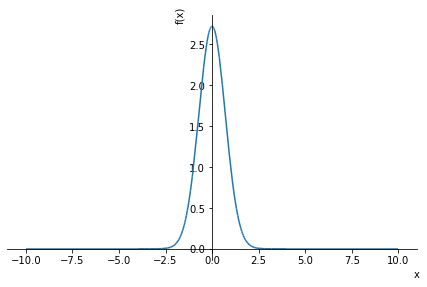

In [124]:
plotting.plot(f)